For detailed information about the dataset and its respective preparation and/or Principal Component Analysis please look at 'Titanic(age_by_mean)_PCA_LogisticRegression'.
In this file I will skip each step explained in that file and will talk about only the things not covered in it.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import r2_score
from sklearn.metrics import classification_report, confusion_matrix
df = pd.read_csv('Data/titanic_train.csv')

In [2]:
df = df.drop(['Name','Ticket','Cabin'], axis=1)

In [3]:
df.loc[:,"Age"].median()


28.0

In [4]:
df["Age"].fillna(28, inplace = True)

In [5]:
df.dropna(inplace=True)

In [6]:
df = pd.get_dummies(df, columns=['Sex'], drop_first=True)

In [7]:
df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)

In [8]:
X=df.drop('Survived',axis=1)
X_renamed = X.rename(columns={'SibSp': 'Num Siblings/Spoused','Parch':'Num Parents/Children'})
y=df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X_renamed, y, test_size=0.3,random_state=2)

C:\Users\Ricardo_2\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


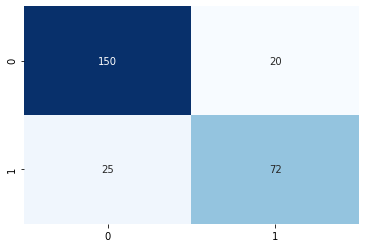

In [9]:
from sklearn.linear_model import LogisticRegression


LR = LogisticRegression()
LR.fit(X_train,y_train)
prediction_LR = LR.predict(X_test)

cfm = confusion_matrix(y_test,prediction_LR)
sns.heatmap(cfm, cbar=False, annot=True, cmap='Blues', fmt='d')

In [10]:
for solver in ('lbfgs', 'liblinear', 'sag', 'saga', 'newton-cg'):
    LR = LogisticRegression(solver=solver, max_iter=3000)
    LR.fit(X_train, y_train)
    prediction_LR = LR.predict(X_test) 
    print('solver = ',solver)
    print(confusion_matrix(y_test, prediction_LR))
    print(classification_report(y_test, prediction_LR))

solver =  lbfgs
[[150  20]
 [ 23  74]]
              precision    recall  f1-score   support

           0       0.87      0.88      0.87       170
           1       0.79      0.76      0.77        97

    accuracy                           0.84       267
   macro avg       0.83      0.82      0.82       267
weighted avg       0.84      0.84      0.84       267

solver =  liblinear
[[154  16]
 [ 25  72]]
              precision    recall  f1-score   support

           0       0.86      0.91      0.88       170
           1       0.82      0.74      0.78        97

    accuracy                           0.85       267
   macro avg       0.84      0.82      0.83       267
weighted avg       0.85      0.85      0.84       267



C:\Users\Ricardo_2\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


solver =  sag
[[163   7]
 [ 64  33]]
              precision    recall  f1-score   support

           0       0.72      0.96      0.82       170
           1       0.82      0.34      0.48        97

    accuracy                           0.73       267
   macro avg       0.77      0.65      0.65       267
weighted avg       0.76      0.73      0.70       267

solver =  saga
[[162   8]
 [ 68  29]]
              precision    recall  f1-score   support

           0       0.70      0.95      0.81       170
           1       0.78      0.30      0.43        97

    accuracy                           0.72       267
   macro avg       0.74      0.63      0.62       267
weighted avg       0.73      0.72      0.67       267

solver =  newton-cg
[[150  20]
 [ 23  74]]
              precision    recall  f1-score   support

           0       0.87      0.88      0.87       170
           1       0.79      0.76      0.77        97

    accuracy                           0.84       267
   macro a

C:\Users\Ricardo_2\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


The best solver proved to be 'liblinear' so I am going to fit the dataset with it and run the parameters to compare with the other models.

Variance score: 0.34
              precision    recall  f1-score   support

           0       0.86      0.91      0.88       170
           1       0.82      0.74      0.78        97

    accuracy                           0.85       267
   macro avg       0.84      0.82      0.83       267
weighted avg       0.85      0.85      0.84       267



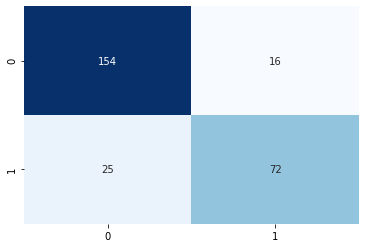

In [11]:
LR = LogisticRegression(solver='liblinear')
LR.fit(X_train,y_train)
prediction_LR = LR.predict(X_test)

cfm = confusion_matrix(y_test,prediction_LR)
sns.heatmap(cfm, cbar=False, annot=True, cmap='Blues', fmt='d')
print('Variance score: %.2f' % r2_score(y_test, prediction_LR))
print(classification_report(y_test, prediction_LR))

In [12]:
Score = round(LR.score(X_train, y_train) * 100, 2)
Score

79.58